# Problem 6: Regression

# 6.1 MPG Dataset

In [23]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [24]:
# Load the mpg dataset
mpg = sns.load_dataset("mpg")

In [25]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Explolatory Data Analysis

In [26]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


### Missing values

In [27]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [28]:
mpg['horsepower'] = mpg['horsepower'].fillna(mpg['horsepower'].median())

### EDA

In [29]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


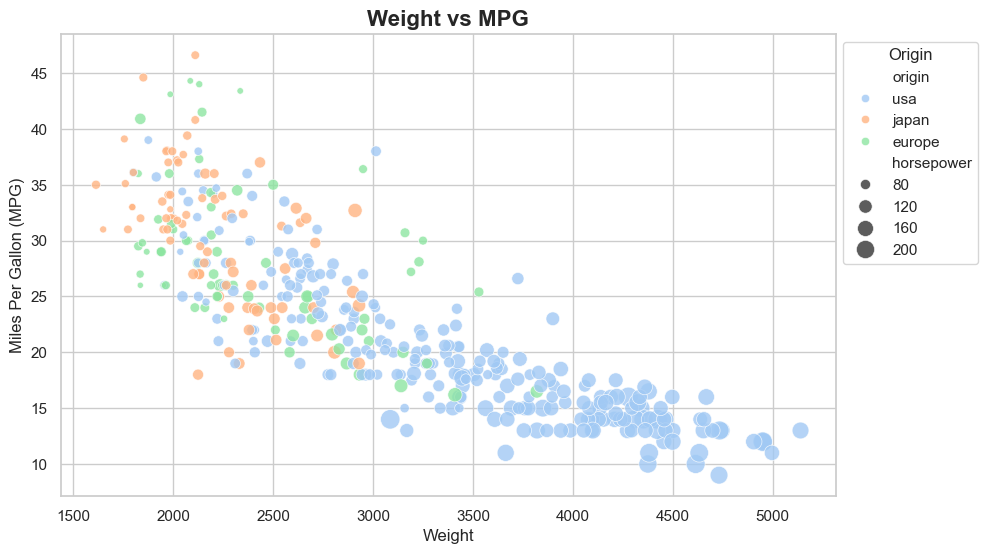

In [30]:
sns.set_theme(style="whitegrid", palette="pastel")

# 1. Scatterplot: Weight vs MPG
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=mpg, x='weight', y='mpg', hue='origin', size='horsepower', sizes=(20, 200), alpha=0.8
)
plt.title("Weight vs MPG", fontsize=16, fontweight='bold')
plt.xlabel("Weight", fontsize=12)
plt.ylabel("Miles Per Gallon (MPG)", fontsize=12)
plt.legend(title="Origin", bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

- USA tends to make car with higher weights
- Japan and Europe make similar cars
- higher weight cars tend to have less miles per gallon
- Japan and Europe cars are most likely to be more efficient than USA cars in term of miles per gallon

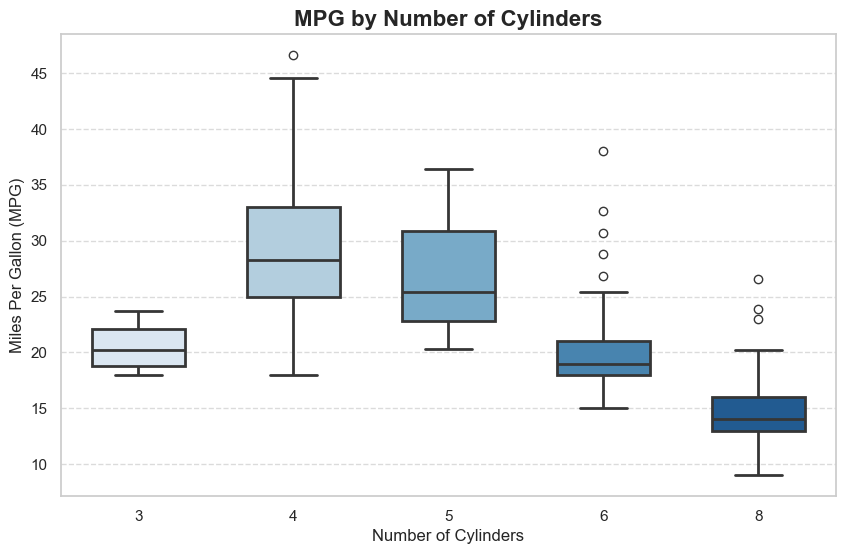

In [31]:
# Boxplot: MPG by Number of Cylinders
plt.figure(figsize=(10, 6))
sns.boxplot(data=mpg, x='cylinders', y='mpg', palette="Blues", width=0.6, linewidth=2)
plt.title("MPG by Number of Cylinders", fontsize=16, fontweight='bold')
plt.xlabel("Number of Cylinders", fontsize=12)
plt.ylabel("Miles Per Gallon (MPG)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Cars with different cylinders mostly have distinctable miles per gallon, except cars with 3 amd 6 cylinder which may be similar.

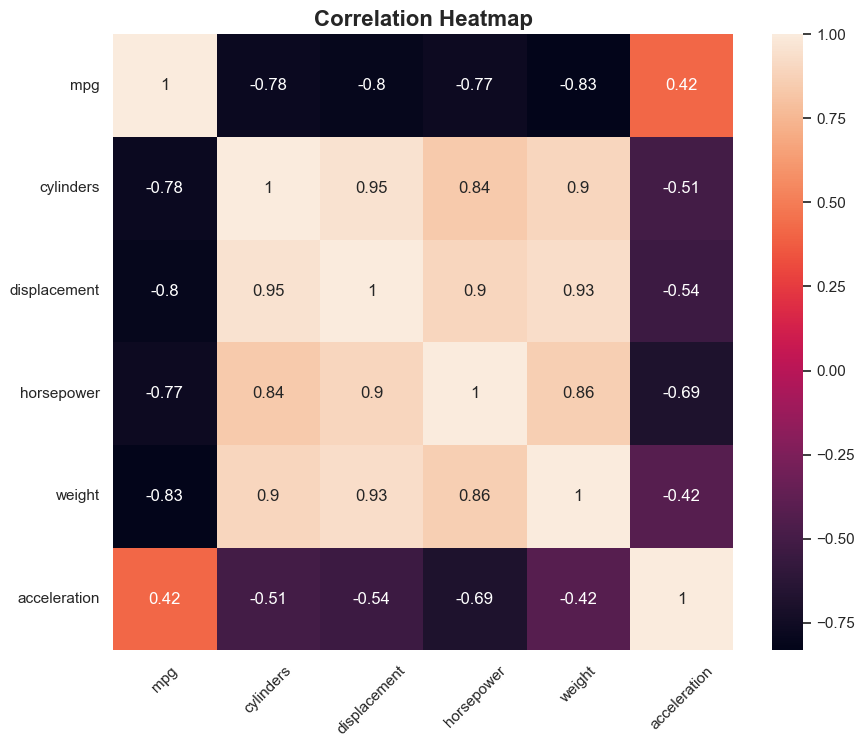

In [32]:
# Heatmap: Correlation between numerical variables
plt.figure(figsize=(10, 8))
corr = mpg.select_dtypes('number').drop(columns='model_year').corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Accelaration barely have any correlation at all to any of the other features

<Figure size 1200x800 with 0 Axes>

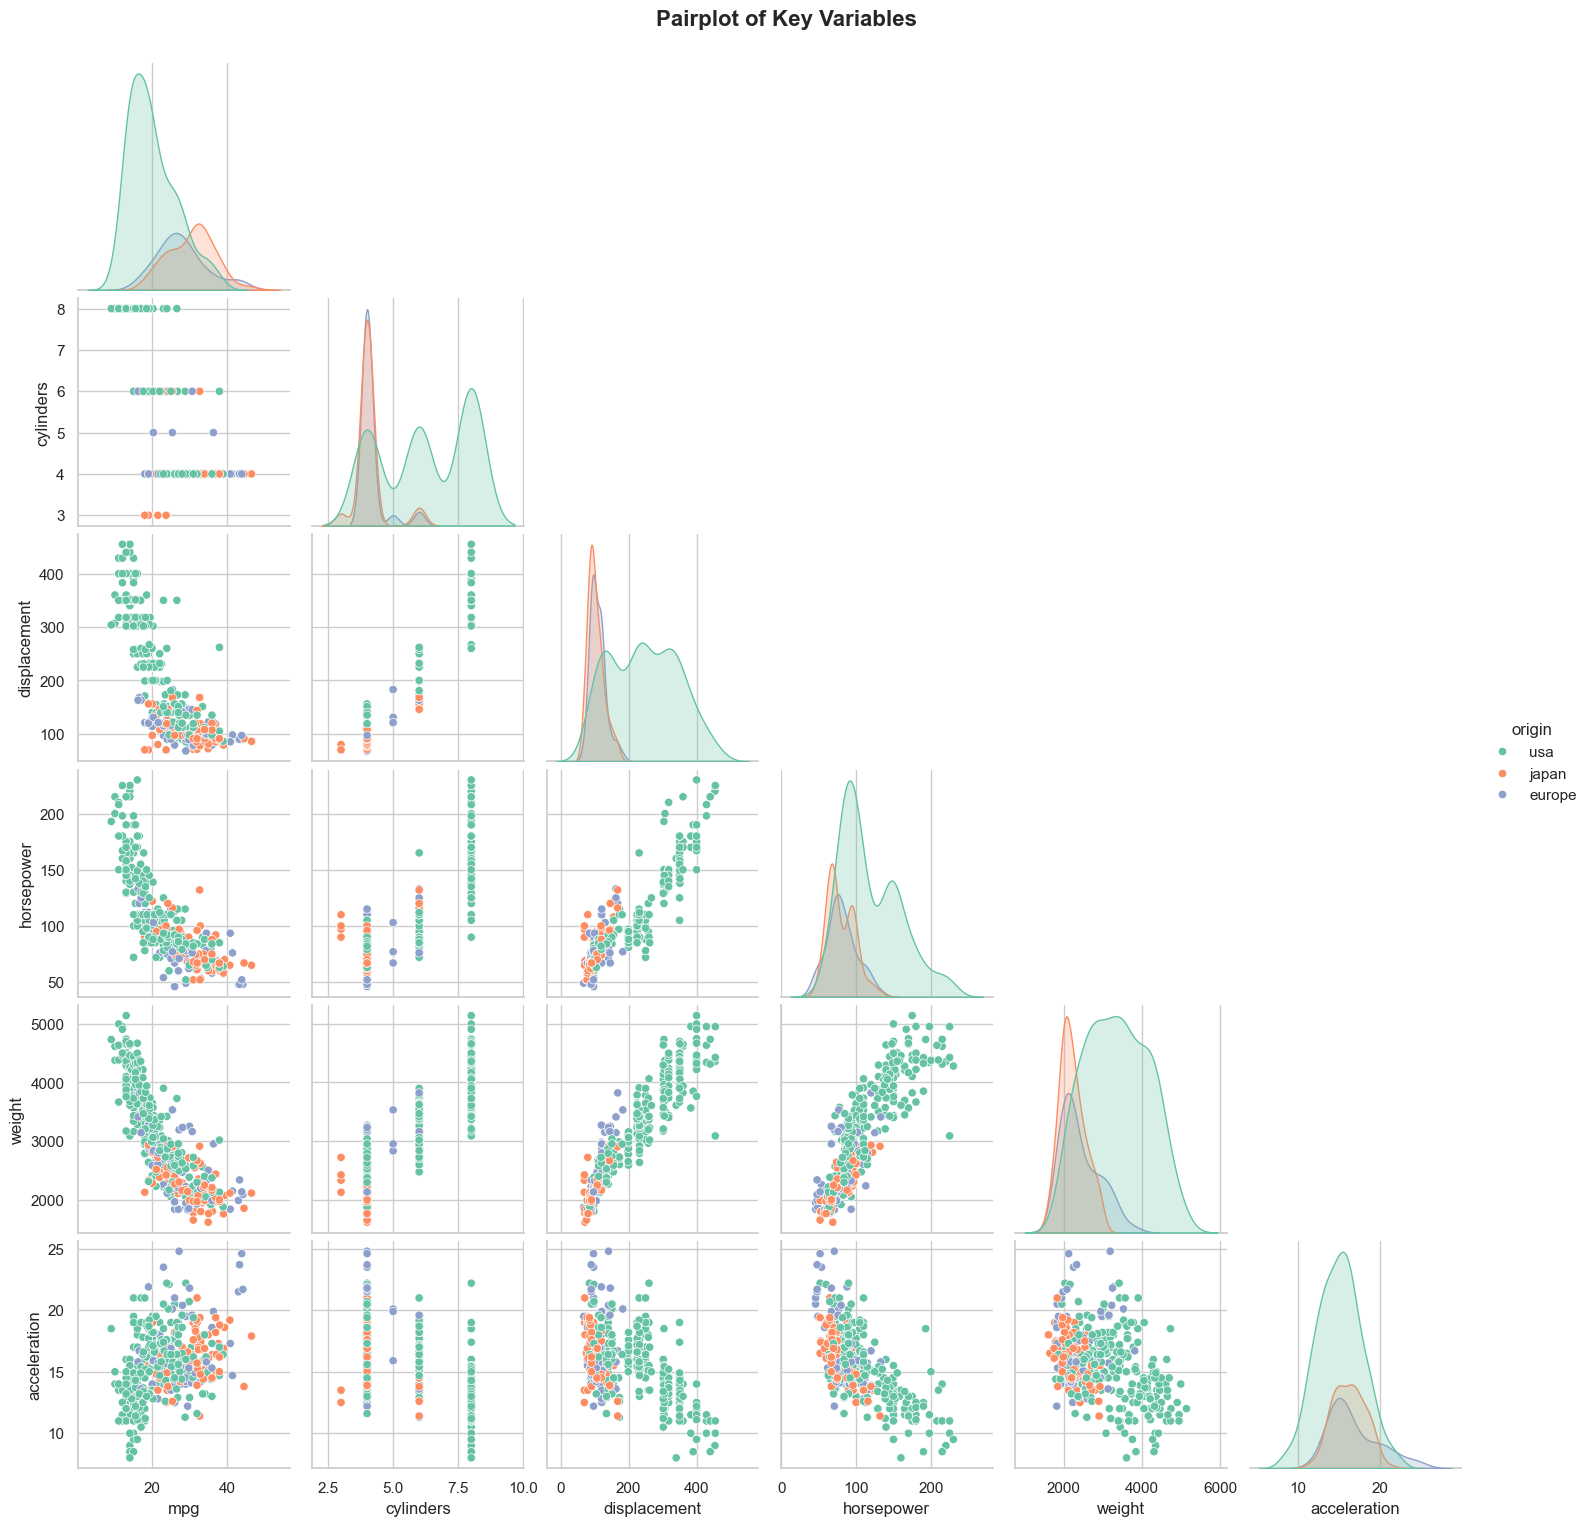

In [33]:
plt.figure(figsize=(12, 8))
pairplot = sns.pairplot(
    mpg.drop(columns='model_year'), hue='origin', palette='Set2', diag_kind='kde', corner=True, height=2.5
)
pairplot.fig.suptitle("Pairplot of Key Variables", y=1.02, fontsize=16, fontweight='bold')
plt.show()

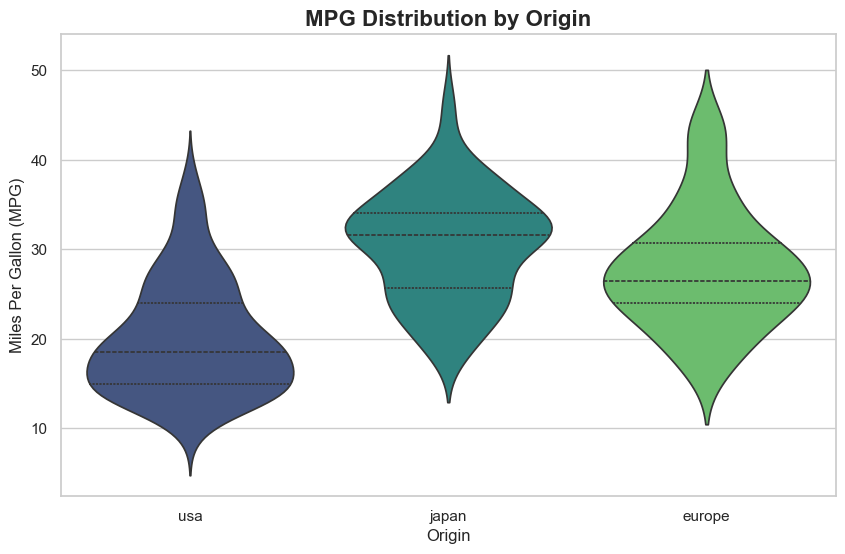

In [34]:
# Violinplot: MPG by Origin
plt.figure(figsize=(10, 6))
sns.violinplot(data=mpg, x='origin', y='mpg', inner='quartile', palette='viridis')
plt.title("MPG Distribution by Origin", fontsize=16, fontweight='bold')
plt.xlabel("Origin", fontsize=12)
plt.ylabel("Miles Per Gallon (MPG)", fontsize=12)
plt.show()

## Binary logistic Regression with Scikit-learn

In [42]:
# Convert to binary
mpg['mpg_binary'] = (mpg['mpg'] > mpg['mpg'].median()).astype(int)
mpg['mpg'].median()

23.0

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

acceleration have weak relationship or pattern with mpg, model_year abd name is not practical to be used in the modeling

In [37]:
# Select features
features = ['weight', 'horsepower', 'displacement', 'cylinders']
X = mpg[features]
y = mpg['mpg_binary']

In [38]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.88        42
           1       0.83      0.92      0.88        38

    accuracy                           0.88        80
   macro avg       0.88      0.88      0.88        80
weighted avg       0.88      0.88      0.88        80


Accuracy: 0.875
Confusion Matrix:


<Axes: >

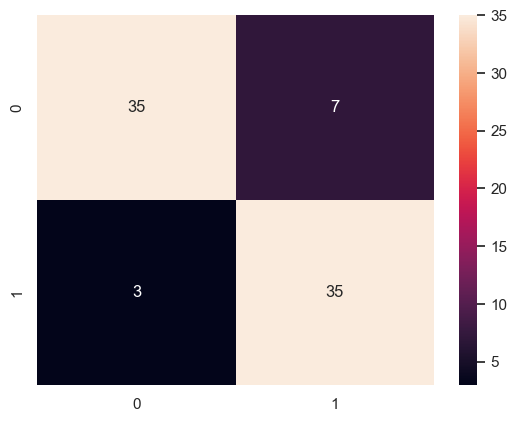

In [39]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [40]:
import pickle as pkl

with open("Model/model6_1.pkl", "wb") as file:
    pkl.dump(model, file)

with open("Model/scaler6_1.pkl", "wb") as file:
    pkl.dump(scaler, file)

## Binary Logistic Regression with Torch

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim

In [21]:
# convert to tensor
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [22]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

In [23]:
# Initialize Model
input_dim = X_train.shape[1]
model = LogisticRegression(input_dim=input_dim)

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [24]:
# Train the model
epochs = 10000
for epoc in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train.unsqueeze(1))
    loss.backward()
    optimizer.step()

    if (epoc +1) % 1000 == 0:
        print(f"Epoch [{epoc}/{epochs}], Loss: {loss.item():.4f}")

Epoch [999/10000], Loss: 0.3124
Epoch [1999/10000], Loss: 0.2960
Epoch [2999/10000], Loss: 0.2899
Epoch [3999/10000], Loss: 0.2869
Epoch [4999/10000], Loss: 0.2850
Epoch [5999/10000], Loss: 0.2838
Epoch [6999/10000], Loss: 0.2829
Epoch [7999/10000], Loss: 0.2822
Epoch [8999/10000], Loss: 0.2817
Epoch [9999/10000], Loss: 0.2812


In [25]:
# Evaluation
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)
    y_pred_labels = (y_pred_test >= 0.5).float()
    acc = accuracy_score(y_test.unsqueeze(1), y_pred_labels)
    print("\nTest Accuracy:", acc)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_labels))


Test Accuracy: 0.8625

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86        42
         1.0       0.81      0.92      0.86        38

    accuracy                           0.86        80
   macro avg       0.87      0.87      0.86        80
weighted avg       0.87      0.86      0.86        80



Confusion Matrix:


<Axes: >

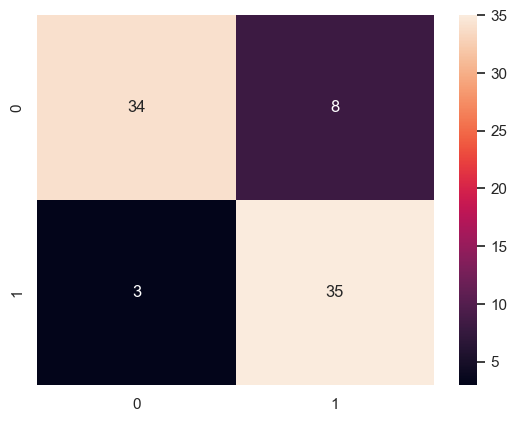

In [26]:
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_labels), annot=True)

In [27]:
torch.save(model, "Model/model6_1_2.pth")

# 6.2: Car Dataset

In [28]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 

In [29]:
df = pd.DataFrame(car_evaluation.data.features, columns=car_evaluation.feature_names)
df['target'] = car_evaluation.data.targets

In [30]:
df

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


## EDA

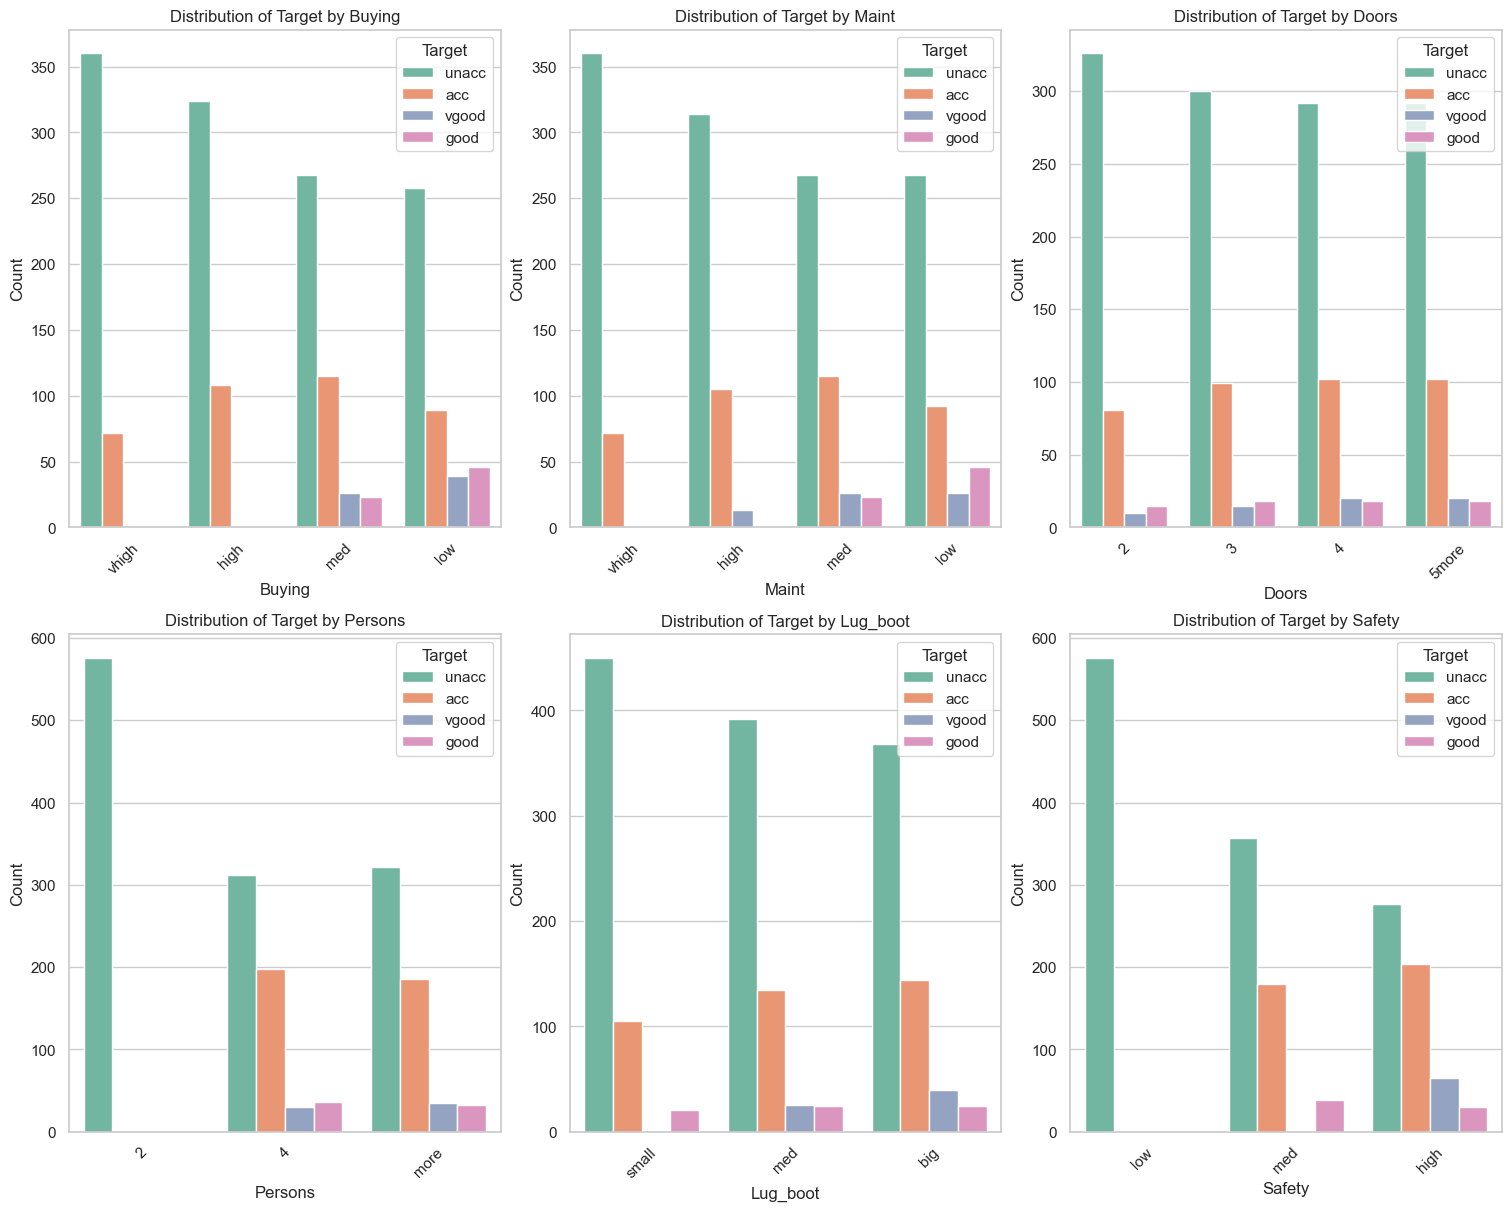

In [31]:
fig, axes = plt.subplots(2, 3, figsize=(15, 12), constrained_layout=True)
axes = axes.flatten()

# Plot grouped bar plots for each feature vs target
for i, feature in enumerate(df.columns[:-1]):
    sns.countplot(data=df, x=feature, hue='target', ax=axes[i], palette='Set2')
    axes[i].set_title(f'Distribution of Target by {feature.capitalize()}')
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Target')
    axes[i].tick_params(axis='x', rotation=45)
plt.show()

## Features Importances

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode categorical features and target
df_encoded = df.copy()
for col in df.columns:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])

X = df_encoded[df.columns[:-1]]
y = df_encoded['target']

In [144]:
# Chi-Square test
chi_scores, p_values = chi2(X_selected, y_selected)
chi2_results = pd.DataFrame({
    'Feature': df.columns[:-1],
    'Chi-Square Score': chi_scores,
    'p-Value': p_values
}).sort_values(by='Chi-Square Score', ascending=False)

chi2_results

,Feature,Chi-Square Score,p-Value
5,safety,73.958562,6.057509e-16
4,lug_boot,24.320477,2.141256e-05
3,persons,12.383107,6.179654e-03
1,maint,7.673170,5.327200e-02
2,doors,3.251220,3.544898e-01
0,buying,3.106974,3.754242e-01


In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Mutual information
mi_scores = mutual_info_classif(X, y, discrete_features=True)

# Display results
mi_results = pd.DataFrame({
    'Feature': df.columns[:-1],
    'Mutual Information Score': mi_scores
}).sort_values(by='Mutual Information Score', ascending=False)

mi_results

,Feature,Mutual Information Score
5,safety,0.351743
0,buying,0.276963
1,maint,0.247873
3,persons,0.146951
4,lug_boot,0.093737
2,doors,0.016842


## Multi-Class Logistic Regression with Scikit-learn

In [129]:
y_selected.value_counts()

target
2    150
0    150
1     69
3     65
Name: count, dtype: int64

In [135]:
sample_index = (
    y[y == 2].sample(70).index
    .union(y[y == 0].sample(70).index)
    .union(y[y == 1].index)
    .union(y[y == 3].index)
)

In [154]:
X_selected = X[['persons', 'safety', 'lug_boot', 'maint']].loc[sample_index]
y_selected = y.loc[sample_index]

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42, stratify=y_selected)

In [156]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.07      0.08        14
           1       0.25      0.21      0.23        14
           2       0.43      0.43      0.43        14
           3       0.67      0.92      0.77        13

    accuracy                           0.40        55
   macro avg       0.36      0.41      0.38        55
weighted avg       0.35      0.40      0.37        55


Accuracy: 0.4
Confusion Matrix:


<Axes: >

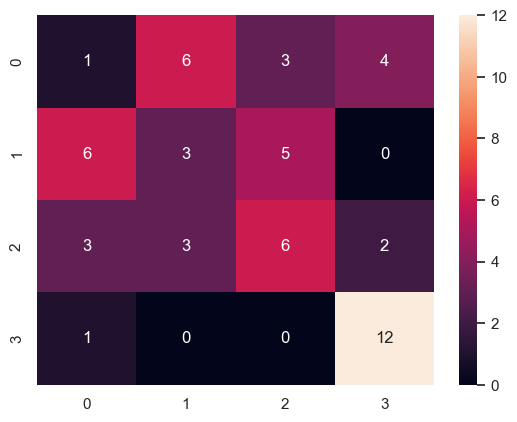

In [157]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [148]:
with open("Model/model6_2.pkl", "wb") as file:
    pkl.dump(model, file)

## Multi-Class Logistic Regression with Torch

In [149]:
# convert to tensor
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [150]:
class MultiClassLogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MultiClassLogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

In [161]:
import numpy as np
# Initialize Model
input_dim = X_train.shape[1]
output_dim = len(np.unique(y))
model = MultiClassLogisticRegression(input_dim=input_dim, output_dim=output_dim)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [162]:
# Train the model
epochs = 10000
for epoc in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train.long())
    loss.backward()
    optimizer.step()

    if (epoc +1) % 100 == 0:
        print(f"Epoch [{epoc}/{epochs}], Loss: {loss.item():.4f}")

Epoch [99/10000], Loss: 1.3098
Epoch [199/10000], Loss: 1.2968
Epoch [299/10000], Loss: 1.2846
Epoch [399/10000], Loss: 1.2731
Epoch [499/10000], Loss: 1.2623
Epoch [599/10000], Loss: 1.2522
Epoch [699/10000], Loss: 1.2427
Epoch [799/10000], Loss: 1.2337
Epoch [899/10000], Loss: 1.2253
Epoch [999/10000], Loss: 1.2173
Epoch [1099/10000], Loss: 1.2097
Epoch [1199/10000], Loss: 1.2025
Epoch [1299/10000], Loss: 1.1956
Epoch [1399/10000], Loss: 1.1891
Epoch [1499/10000], Loss: 1.1829
Epoch [1599/10000], Loss: 1.1769
Epoch [1699/10000], Loss: 1.1712
Epoch [1799/10000], Loss: 1.1658
Epoch [1899/10000], Loss: 1.1606
Epoch [1999/10000], Loss: 1.1556
Epoch [2099/10000], Loss: 1.1508
Epoch [2199/10000], Loss: 1.1462
Epoch [2299/10000], Loss: 1.1418
Epoch [2399/10000], Loss: 1.1376
Epoch [2499/10000], Loss: 1.1336
Epoch [2599/10000], Loss: 1.1297
Epoch [2699/10000], Loss: 1.1260
Epoch [2799/10000], Loss: 1.1224
Epoch [2899/10000], Loss: 1.1191
Epoch [2999/10000], Loss: 1.1158
Epoch [3099/10000], L

In [163]:
# Evaluation
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)
    y_pred_labels = torch.argmax(y_pred_test, dim=1)
    acc = accuracy_score(y_test, y_pred_labels)
    print("\nTest Accuracy:", acc)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_labels))


Test Accuracy: 0.7263969171483622

Classification Report:
              precision    recall  f1-score   support

         0.0       0.48      0.22      0.30       115
         1.0       0.00      0.00      0.00        21
         2.0       0.75      0.97      0.85       363
         3.0       0.00      0.00      0.00        20

    accuracy                           0.73       519
   macro avg       0.31      0.30      0.29       519
weighted avg       0.63      0.73      0.66       519



Confusion Matrix:


<Axes: >

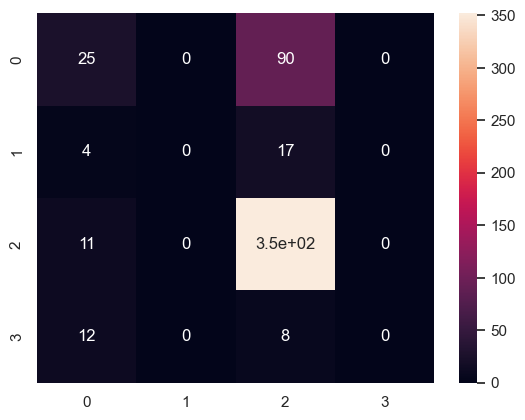

In [164]:
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_labels), annot=True)